## Website Analysis

### Final Design

As we do each week, we need to lay out a design of what the final program should look
like, as well as how it should function. For testing purposes, we’ll use Microsoft’s home
page. Eventually, we’ll want the final output to look like Figure 10-9.

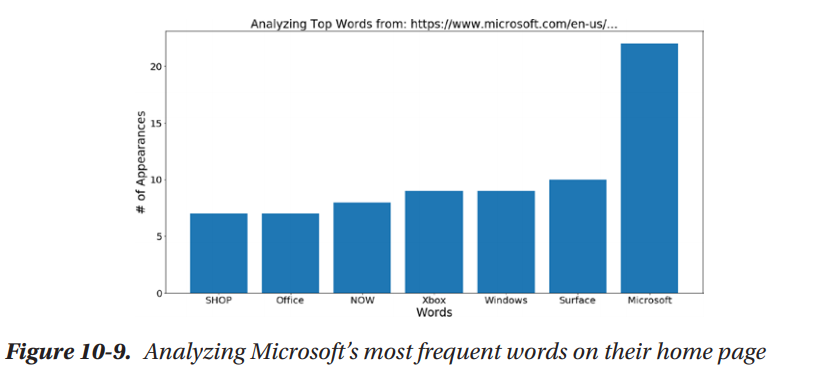

In [1]:
from IPython.display import Image
Image("../../Pictures/figure_10_9.png")

In [28]:
# imports
import requests
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")

from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output
from nltk.corpus import stopwords
from collections import Counter
from urllib.parse import urlparse

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nooru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# helper functions

def filter_invisible_tags(element):
    """
    helper function to filter out all elements that do not
    contain text that appears on the site.
    """
    # if the element in question in a child of any of the tags in the
    # list to iterated over, then it must be invisible on display
    if element.parent.name in [
        "style", "script", "head", "title", "meta", "[document]"]:
        return False
    
    # HTML comments are to be removed as well
    if isinstance(element, Comment):
        return False
    
    # remove new lines
    if element in ["\n", "\t"]: # 3
        return False
    
    # if the flow of control has made it here, we must
    # have a visible element on our hands
    return True


STOPWORDS = stopwords.words("english")
def filter_stopwords(word): # 4
    """
    filters words based on membership to a collection 'stopwords'.
    In NLP stop words are high-frequency, low-signal lexicons that
    are filtered from a document to enhance meaning.
    """
    if word.casefold() in STOPWORDS:
        return False
    else:
        return True

In [40]:
# main functions
# request site and return top 7 most used words
def scrape(_response): # 2
    """
    function inputs a response object and then:
        1) creates a soup object
        2) filters for non-visible text in the response
        3) filters out stopwords in the remaining filter object
        4) passing the result to a collections.Counter object
        5) returns the 7 highest occurring words along with their frequencies
    """
    word_container = []
    
    soup = BeautifulSoup(_response.content, "html.parser")
    
    # will retreive all text nodes within the DOM 
    total_text = soup.find_all(text = True)
    
    # filter out invisible text
    visible_text = filter(filter_invisible_tags, total_text)
    
    for text in visible_text:
        words = text.split(" ")
        words = list(filter(filter_stopwords, words))
        
        for word in words:
            if word not in ["", "&"]:
                word_container.append(word)
        
    word_counter = Counter(word_container) # 6
    return word_counter.most_common(7)


def display_results(_input, _url):
    """
    takes the list of tuples from scrape() and processes
    it into x- and y-axis containers, generates a bar chart.
    """
    _unzipped_input = list(zip(*_input))
    
    # x_axis is the word, y_axis the corresponding word count
    x_axis, y_axis = _unzipped_input[0], _unzipped_input[1]
    
    # visualization logic
    plt.figure(figsize = (20, 10))
    
    plt.bar(x_axis, y_axis)
    # create a presentation representation of url
    _title_url = _url.netloc + _url.path
    plt.title(f"Analyzing Top Words from: {_title_url}",
              fontname = "Sans Serif",
              fontsize = 24)
    plt.xlabel("Words", fontsize = 24)
    plt.ylabel("Frequency", fontsize = 24)
    plt.xticks(fontname = "Sans Serif", fontsize = 20)
    plt.yticks(fontname = "Sans Serif", fontsize = 20)
    plt.show()

Enter the URL of a website to analyze:  https://www.microsoft.com/en-us/


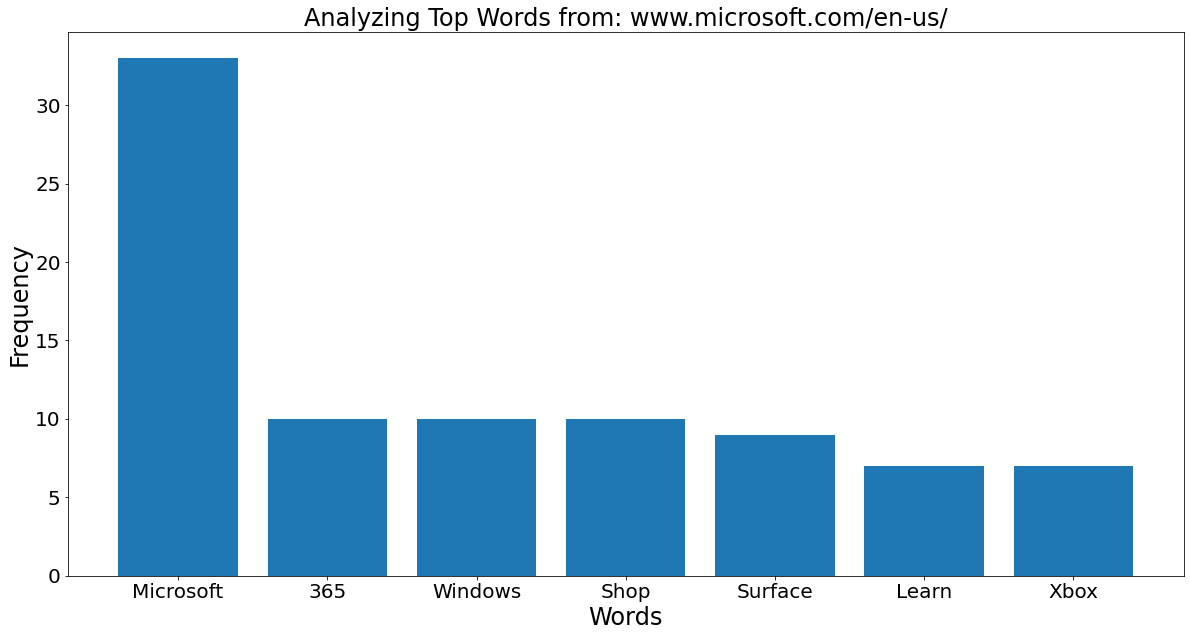

Would you like to scrape website (y/n)?  n


Thanks for analyzing! Come back again!


In [41]:
# main loop should ask if user wants to scrape
# then what site to scrape
while input("Would you like to scrape website (y/n)? ") == "y":
    try:
        clear_output()
        response = requests.get(input("Enter the URL of a website to analyze: ")) # 1
        user_url = urlparse(response.url) # 7
        
        to_display = scrape(response)
        display_results(to_display, user_url)
        
    except requests.exceptions.MissingSchema:
        print("Your input is not a valid URL! :(")
        print("Please try again!", end = "\n")
print("Thanks for analyzing! Come back again!")

### Summary of changes I've made from Milliken:

1. Used requests.get which automatically handles invalid urls with the MissingSchema error, which we catch in the associated exception clause.
2. Because of (1) the scrape() function receives a 'requests.models.Response' object.
3. Decided the include the removal of newlines in the filter_invisible_tags() functions.
4. For the filter_stopwords() function (originally filter_waste()), I decided to use the stopwords collection from the nltk package, which is commonly used in NLP to filter out high-frequency low-signal words such as articles.
5. Decided to use a local 'word_container' list object to store words post-processing.
6. Calculated the word frequency with a collections.Counter object.
7. Used urllib.parse.urlparse to better truncate the user url for the graph title.